## Lesson 5: 
### Exercise 1: Position of a quasar

### Homoscedastic case:

1. We draw a sample of N gaussianly distributed numbers (Those will be our data). In this case the parameters of the original distribution are 
$$\mu = 1$$ 
$$\sigma = 0.2$$
Usually we can know $\sigma$ a priori (e.g. If it's a property of the telescope) and we usually want to infer $\mu$. We will reproduce this procedure in this exercise: we'll treat $\mu$ as an unknown parameter and we'll check later if we get a consistent result.

2. We treat every number as an independent measurement of the position of a quasar, each one with its own probability (gaussian).
3. We build the **Likelihood function** by taking the product of those probabilities.
4. We look for the MLE estimator of the position of the quasar by taking the maximum of the Likelihood function (or equivalently the maximum of the log-likelihood)
5. We compare with the known Maximum Likelihood Estimator for homoscedastic gaussianly distributed data, which is the **sample mean**:

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

Results for the homoscedastic case: 

The maximum likelihood solution is:  0.98
The maximum log-likelihood solution is:  0.98
The MLE estimator (sample mean) of mu gives:  0.983795111813782
The relative error (with respect to the real mu=1 of the distribution) is:  2.0 %


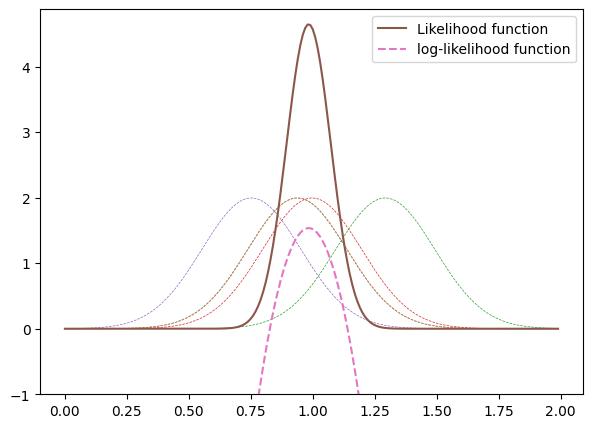

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy import stats, interpolate
from astroML.datasets import fetch_dr7_quasar
from tqdm.notebook import tqdm

mu = 1
sigma = 0.2
N = 5 # We simulate N = 5 independent measurements of the position of a quasar. 

x_i = np.random.normal(mu, sigma, N)
#We want to define the likelihood function.
#First we compute the individual gaussian probabilities p(x|mu,sigma)

x_arr = np.arange(0, 2, 0.01)

probs = [stats.norm(loc=x, scale=sigma) for x in x_i]

fig, ax = plt.subplots(figsize=(7,5))

for p in probs:
    ax.plot(x_arr, p.pdf(x_arr), lw = 0.5, ls = '--')
    
y_arr = [p.pdf(x_arr) for p in probs]
prod = np.prod(np.vstack(y_arr), axis=0) #np.vstack takes the list of arrays and stacks them vertically.
ax.plot(x_arr, prod, label = 'Likelihood function')
ax.set_ylim(-1)

y_arr_log = [p.logpdf(x_arr) for p in probs]
sum_log = np.sum(np.vstack(y_arr_log), axis=0)
ax.plot(x_arr, sum_log, label = 'log-likelihood function', ls = '--')
ax.legend(loc = 'upper right')

mu_lik = x_arr[np.argsort(sum_log)[-1]] #np.argsort() returns the indexes of the sorted array (from smallest to largest)

print('Results for the homoscedastic case: \n')
print('The maximum likelihood solution is: ', x_arr[np.argsort(prod)[-1]])
print('The maximum log-likelihood solution is: ', mu_lik)
print('The MLE estimator (sample mean) of mu gives: ', np.mean(x_i))
print('The relative error (with respect to the real mu=1 of the distribution) is: ', round(np.abs(mu-mu_lik)/mu*100, 2), '%')

6. Now we can check that the error we obtain by manually computing the **Fisher matrix** elements is equal to the error on the sample mean: 

**Standard error on the sample mean:** $$\sigma_\mu = \frac{\sigma}{\sqrt{N}}$$
**Uncertainty given by the Fisher Matrix elements:** $$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}} $$
With $F_{jk} = - \frac{d^2 \ln L}{d\theta_j d\theta_k} \Biggr\rvert_{\theta=\hat \theta}$ (in our case, $j=k=0$ since we have only one parameter: $\mu$)

The error on the mean, using the general Fisher matrix estimate is:  0.08944271909998777
The known "standard error on the sample mean" is:  0.08944271909999159


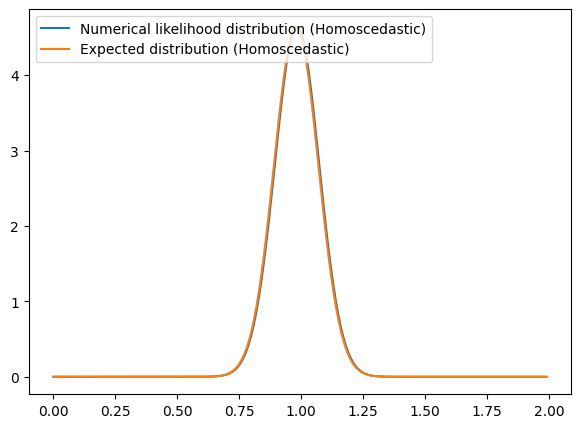

In [26]:
#We want to approximate the second derivative of the likelihood: we apply the np.diff() function twice and we devide by the step on the x axis, to the 2nd power
diff_2 = np.sqrt(-np.diff(np.diff(sum_log))/(0.01**2))
sig_lik = 1/diff_2[np.argsort(sum_log)[-1]] #Second derivative evaluated at the peak x-value of the likelihood.
sig_known = sigma/np.sqrt(N)
print('The error on the mean, using the general Fisher matrix estimate is: ', sig_lik)
print('The known "standard error on the sample mean" is: ', sig_known)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x_arr, prod, label = 'Numerical likelihood distribution (Homoscedastic)')

dist_norm = stats.norm(loc = mu_lik, scale = sig_lik)

normalization_factor = np.max(prod)/np.max(dist_norm.pdf(x_arr))
ax.plot(x_arr, dist_norm.pdf(x_arr)*normalization_factor, label = 'Expected distribution (Homoscedastic)') #We introduced manually a scaling factor
ax.legend(loc = 'upper left')

plt.show()

---
### Heteroscedastic case

Let's generalize the exercise to the **Heteroscedastic case**, by assuming that each measurement has a different error $\sigma_i$ extracted from a normal distribution with $\mu = 0.2$ and $\sigma = 0.05$

Results for the heteroscedastic case: 

The maximum likelihood solution is:  1.1300000000000001
The maximum log-likelihood solution is:  1.1300000000000001
The MLE estimator (weighted mean) is:  1.1326618683431597
The relative error (with respect to the real mu=1 of the distribution) is:  13.0 %


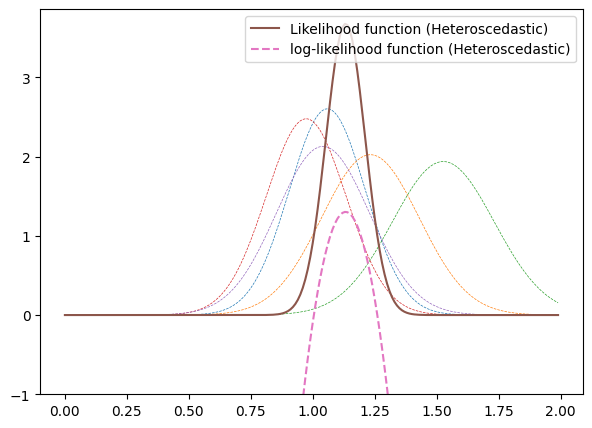

In [27]:
sigma_i = np.random.normal(0.2, 0.05, N)
x_i = np.concatenate([np.random.normal(mu, sig, 1) for sig in sigma_i])

x_arr = np.arange(0, 2, 0.01)
lik_eter = [stats.norm(loc=x, scale=sig) for (x, sig) in zip(x_i, sigma_i)]

fig, ax = plt.subplots(figsize=(7,5))
for i in lik_eter:
    ax.plot(x_arr, i.pdf(x_arr), lw = 0.5, ls = '--')

y_eter = [a.pdf(x_arr) for a in lik_eter]
product = np.prod(np.vstack(y_eter), axis=0)
ax.plot(x_arr, product, label = 'Likelihood function (Heteroscedastic)')
ax.set_ylim(-1)

y_eter_log = [a.logpdf(x_arr) for a in lik_eter]
sum_log_eter = np.sum(np.vstack(y_eter_log), axis=0) 
ax.plot(x_arr, sum_log_eter, label = 'log-likelihood function (Heteroscedastic)', ls = '--')
ax.legend(loc = 'upper right')

mu_lik_eter = x_arr[np.argsort(sum_log_eter)[-1]]
mu_weighted = np.average(x_i, weights=1/sigma_i**2)

print('Results for the heteroscedastic case: \n')
print('The maximum likelihood solution is: ', x_arr[np.argsort(product)[-1]])
print('The maximum log-likelihood solution is: ', mu_lik_eter)
print('The MLE estimator (weighted mean) is: ', mu_weighted)
print('The relative error (with respect to the real mu=1 of the distribution) is: ', round(np.abs(mu-mu_lik_eter/mu)*100, 2), '%')

The error on the estimated mean, using the general Fisher matrix estimate is:  0.07930727674391103
The known error on the weighted mean is:  0.07930727674390946


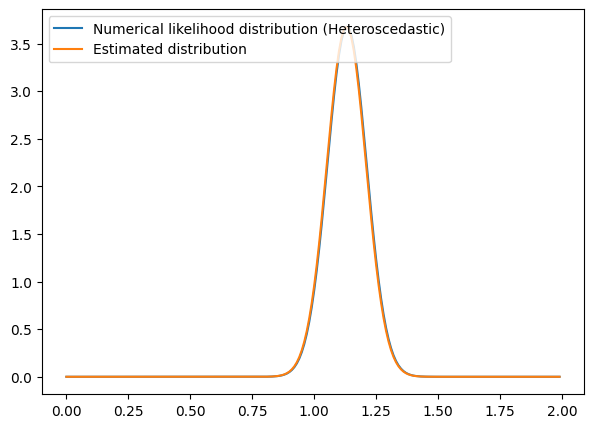

In [28]:
diff_2_eter = np.diff(np.diff(sum_log_eter))/(0.01**2)
sig_lik_eter = (-diff_2_eter[np.argsort(sum_log_eter)[-1]])**(-0.5)
mu_weighted = (np.sum(x_i/(sigma_i**2)))/(np.sum(1/(sigma_i**2)))

print('The error on the estimated mean, using the general Fisher matrix estimate is: ', sig_lik_eter)
print('The known error on the weighted mean is: ', (np.sum(1/(sigma_i**2)))**(-0.5))

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x_arr, product, label = 'Numerical likelihood distribution (Heteroscedastic)')

dist_norm_eter = stats.norm(loc = mu_lik_eter, scale = sig_lik_eter)
ax.plot(x_arr, dist_norm_eter.pdf(x_arr)*(np.max(product)/np.max(dist_norm_eter.pdf(x_arr))), label = 'Estimated distribution') #We introduced manually a scaling factor
ax.legend(loc = 'upper left')